# Question 1: Generate two datasets, $X$ (training) and $X_1$ (testing), each consisting of N=1000 examples represented by 3-D vectors belonging 3 equiprobable classes $w_1$, $w_2$, and $w_3$. The parameters for the classes are as follows:

$m_{1} = [0, 0, 0]T$
$m_{2} = [1, 2, 2]T$
$m_{3} = [3, 3, 4]T$
$S_{1} = S_{2} = S_{3} = $ [[0.8, 0, 0], [0, 0.8, 0], [0, 0, 0.8]] $= \sigma^{2} l$

#### a) Using X, calculate the Maximum Likelihood (ML) estimator for the means and covariance matrices for the three classes. Since it is assumed that the three covariance matrices should be the same, calculate them for all three classes and take the average as the final estimate.
#### b) Employ the classifier based on Euclidean distance to classify patterns in X1, using the computed (MLE) values from the previous step.
#### c) Utilize the classifier based on Mahalanobis distance to classify patterns in X1, using the computed (MLE) values from the previous step.
#### d) Apply the Bayes classifier to classify patterns in X1, using the computed (MLE) values from the previous step.
#### e) For each case, calculate the classification error and compare the results. Why are the performances close to each other?

In [23]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal

np.random.seed(42)

In [4]:
N = 1000
n_classes = 3

m_1 = np.array([0, 0, 0]).T
m_2 = np.array([1, 2, 2]).T
m_3 = np.array([3, 3, 4]).T

cov = np.eye(3)
cov[cov == 1.0] = 0.8

X = []
y = []

for i in range(n_classes):
    if (i == 0):
        x = np.random.multivariate_normal(m_1, cov, N//n_classes)
    elif (i == 1):
        x = np.random.multivariate_normal(m_2, cov, N//n_classes)
    else:
        x = np.random.multivariate_normal(m_2, cov, N//n_classes)
    y.extend([i] * (N//n_classes))
    X.append(x)

X = np.vstack(X)

## shuffle the Dataset
s_id = np.arange(N-1)
np.random.shuffle(s_id)
X = X[s_id]
y = np.array(y)[s_id]

print(X.shape, y.shape)

(999, 3) (999,)


In [5]:
# Split into train and test sets define the test_size as 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Size of Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")
print(f"Number of Features: {X_train.shape[1]}")

Size of Train: 799, Test: 200
Number of Features: 3


#### a) Calculate ML estimators for means and covariance matrices

In [8]:
class_m = []
cov_m = np.cov(X_train, rowvar=False)
for i in range(n_classes):
    data = X_train[y_train == i]
    class_m.append(np.mean(data, axis=0))

class_m = np.array(class_m)
print(class_m)

[[ 1.63430463e-03 -8.12484480e-02  4.55969625e-02]
 [ 1.01960746e+00  1.97867531e+00  2.02088425e+00]
 [ 1.04319089e+00  2.00196320e+00  1.93565338e+00]]


#### b) Classifier using Euclidean distance

In [11]:
def euclidean(x1, x2):
    return np.sqrt(np.sum((x1-x2) ** 2))

y_pred = []
for x1 in X_test:
    dist = [euclidean(x1, mean) for mean in class_m]
    pred = np.argmin(dist)
    y_pred.append(pred)

acc = accuracy_score(y_test, y_pred)
print(f"Classification error using Euclidean distance: {1-acc}")

Classification error using Euclidean distance: 0.31999999999999995


#### c) Classifier using Mahalanobis distance

In [15]:
def mahalanobis(x, mean, cov):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov)), diff))

y_pred = []
for x1 in X_test:
    dist = [mahalanobis(x1, mean, cov_m) for mean in class_m]
    pred = np.argmin(dist)
    y_pred.append(pred)

acc = accuracy_score(y_test, y_pred)
print(f"Classification error using Mahalanobis distance: {1-acc}")

Classification error using Mahalanobis distance: 0.29000000000000004


#### d) Bayes Classifier (Assuming equal prior probabilities)

In [18]:
y_pred = []
prior_probabilities = np.ones(n_classes)/n_classes
for x1 in X_test:
    pos_probabilities = []

    for i in range(n_classes):
        likelihood = 1 / ((2 * np.pi) ** (3 / 2) * np.sqrt(np.linalg.det(cov_m)))
        exp = -0.5 * mahalanobis(x1, class_m[i], cov_m) ** 2
        prob = prior_probabilities[i] * likelihood * np.exp(exp)
        pos_probabilities.append(prob)
    pred = np.argmax(pos_probabilities)
    y_pred.append(pred)

acc = accuracy_score(y_test, y_pred)
print(f"Classification error using Bayes Classifier: {1-acc}")

Classification error using Bayes Classifier: 0.29000000000000004


# Question 2: Generate a set X with N=1000, following:

$ p(x) = \sum_{j=1}^{3} P_{j} p(x | j)$

$ S_{1} = 0.1, S_{2} = 0.2l, S_{3} = 0.3l $

$ P_{1} = 0.4, P_{2} = 0.4, and P_{3} = 0.2$

$ m_{1} = [1, 1]T$

$ m_{2} = [3, 3]T$

$ m_{3} = [2, 6]T$


In [22]:
N = 1000
n_cluster = 3
S = [0.1, 0.2, 0.3]
P = [0.4, 0.4, 0.2]
m = np.array([
    [1, 1],
    [3, 3],
    [2, 6]
])

X = np.zeros((N, 2))
for i in range(N):
    c = np.random.choice(n_cluster, p=P)
    X[i] = np.random.multivariate_normal(m[c], np.identity(2) * (S[c] ** 2))

X.shape

(1000, 2)

#### a) Apply the EM algorithm (use this one) to determine the parameters of the above dataset, assuming that these parameters are initially unknown. Use:

In [53]:
max_iter = 50
learning_rate = 1e-4
S_hat = np.random.rand(n_cluster)
P_hat = np.random.rand(n_cluster)
m_hat = np.random.rand(n_cluster, 2)

log_likelihoods = []
def EM():
    np.random.seed(42)
    global S_hat, P_hat, m_hat
    for i in range(max_iter):
        # E-step
        r = np.zeros((N, n_cluster))
        for k in range(n_cluster):
            r[:, k] = P_hat[k] * multivariate_normal.pdf(X, mean=m_hat[k], cov=np.identity(2) * (S_hat[k] ** 2))
        r /= np.sum(r, axis=1, keepdims=True)

        # M-step
        Nk = np.sum(r, axis=0)
        for k in range(num_clusters):
            S_hat[k] = np.sqrt(np.sum(r[:, k] * np.sum((X - m_hat[k]) ** 2, axis=1)) / (2 * Nk[k]))
        P_hat = N_k / N
        m_hat = np.dot(r.T, X) / Nk[:, np.newaxis]

        # Calculate the log-likelihood
        log_likelihood = np.sum(np.log(np.sum([P_hat[k] * multivariate_normal.pdf(X, mean=m_hat[k], cov=np.identity(2) * (S_hat[k] ** 2)) for k in range(n_cluster)], axis=0)))
        log_likelihoods.append(log_likelihood)


        # Check the convergence
        if (np.max(np.abs(S_hat - S)) < learning_rate):
            break

In [54]:
EM()

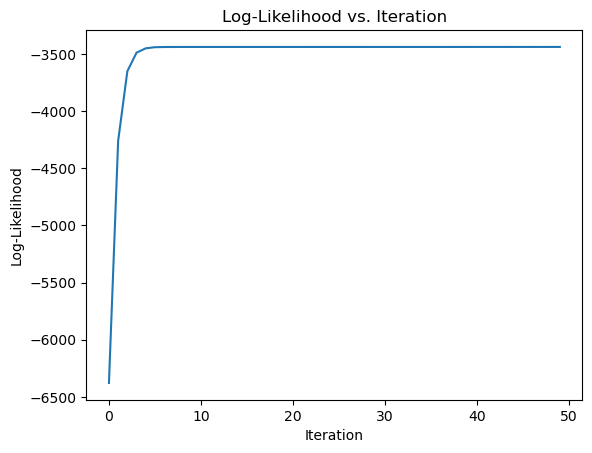

In [55]:
import matplotlib.pyplot as plt

plt.plot(log_likelihoods)
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Iteration')
plt.show()

In [56]:
print("Estimated S_hat:", S_hat)
print("Estimated P_hat:", P_hat)
print("Estimated m_hat:", m_hat)

Estimated S_hat: [1.26444815 0.20108923 0.19689217]
Estimated P_hat: [9.96767069e-01 2.84394527e-03 3.88986201e-04]
Estimated m_hat: [[2.07905172 2.47505768]
 [2.06328109 6.08410291]
 [1.89217777 6.13762035]]


#### b) Modify the initial parameters and assess the impact on the final result. Also, compare the obtained values with the true values of the PDFs.

In [65]:
from sklearn.cluster import KMeans
import warnings

In [66]:
warnings.filterwarnings(action="ignore")
kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X)
m_hat = kmeans.cluster_centers_
S_hat = np.array([np.sqrt(np.mean(np.sum((X[kmeans.labels_ == k] - m_hat[k]) ** 2, axis=1))) for k in range(n_cluster)])
P_hat = np.array([np.mean(kmeans.labels_ == k) for k in range(num_clusters)])

In [67]:
EM()

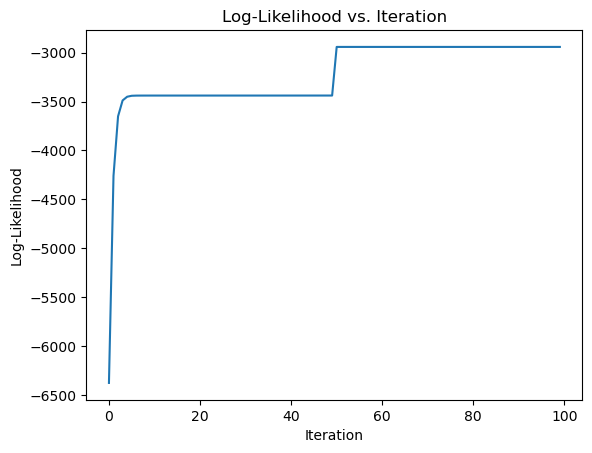

In [68]:
import matplotlib.pyplot as plt

plt.plot(log_likelihoods)
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Iteration')
plt.show()

In [69]:
print("Estimated S_hat:", S_hat)
print("Estimated P_hat:", P_hat)
print("Estimated m_hat:", m_hat)

Estimated S_hat: [0.20003997 0.09753701 0.29794982]
Estimated P_hat: [9.96767069e-01 2.84394527e-03 3.88986201e-04]
Estimated m_hat: [[3.00170558 2.99779325]
 [1.00055748 0.99589054]
 [2.02186143 6.00085496]]


# Question 3: Generate a one-dimensional dataset x such that $x_{i}$ ϵ R, i = 1,2,...,N, following the following pdf:

$p(x) = \frac{1}{3} \frac{1}{\sqrt{2\pi\sigma^{2}}} exp(-\frac{x^2}{2\sigma_{1}^{2}}) + \frac{2}{3} \frac{1}{\sqrt{2\pi\sigma_{2}^{2}}}exp(-\frac{(x-2)^2}{2\sigma^{2}_{2}})$

#### a) Use the Parzen Window method (you can use it with a Gaussian kernel), with h = 0.05; N = 500 and h = 0.2; N = 5000 to estimate the pdf (h is bandwidth). What is the relationship between h and N? What is the relationship between h and σ?

In [96]:
h1 = 0.05
h2 = 0.2
N1 = 500
N2 = 5000


In [97]:
def generate_dataset(N, h1, h2):
    p = np.random.uniform(0, 1, N)
    X = np.zeros(N)
    for i in range(N):
        if (p[i] <= 1/3):
            X[i] = np.random.normal(0, h1)
        else:
            X[i] = np.random.normal(2, h2)
    return X

In [98]:
X1 = generate_dataset(N1, h1, h2)
X2 = generate_dataset(N2, h1, h2)

print(X1.shape, X2.shape)

(500,) (5000,)


In [99]:
def parzen_window(X, h, x_range):
    pdf_est = np.zeros(x_range.shape)
    for xi in X:
        pdf_est += 1 / (h * len(X)) * np.exp(-(x_range - xi)**2 / (2 * h**2))
    return pdf_est

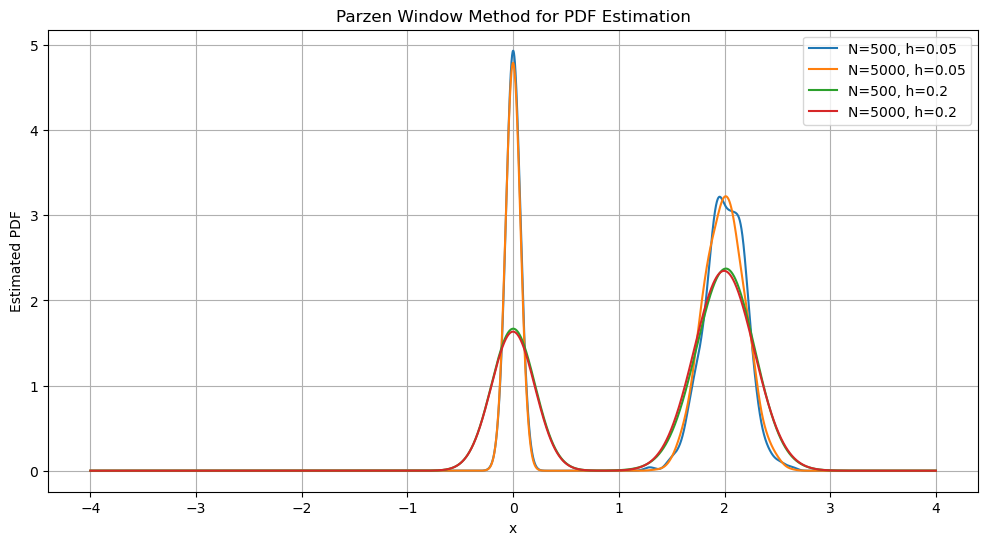

In [101]:
x_range = np.linspace(-4, 4, 10000)

pdf_est_N1_h1 = parzen_window(X1, h1, x_range)
pdf_est_N2_h1 = parzen_window(X2, h1, x_range)


pdf_est_N1_h2 = parzen_window(X1, h2, x_range)
pdf_est_N2_h2 = parzen_window(X2, h2, x_range)


plt.figure(figsize=(12, 6))
plt.plot(x_range, pdf_est_N1_h1, label=f'N={N1}, h={h1}')
plt.plot(x_range, pdf_est_N2_h1, label=f'N={N2}, h={h1}')
plt.plot(x_range, pdf_est_N1_h2, label=f'N={N1}, h={h2}')
plt.plot(x_range, pdf_est_N2_h2, label=f'N={N2}, h={h2}')
plt.title('Parzen Window Method for PDF Estimation')
plt.xlabel('x')
plt.ylabel('Estimated PDF')
plt.legend()
plt.grid(True)
plt.show()